## Long Short Term Memory (LSTM) RNN

# **What are LSTMs?**

LSTMs, or Long Short Term Memory networks are spcialized Recurrent neural netowrks designed to overcome the limitations of Vanilla RNNs or also referred to as Traditional RNNs, which is the inability to  retain information for a long period of time in long sequences due to the vanishing gradient problem.

LSTMs acheive this with a modified architecture consisting of gates and cell state that allows LSTMs to remove unecessary information or retain important information for a longer period of time by passing hidden state and the cell state to the next time step as compared to RNN where only hiddent state is carried onto to the next time step which helps ,make better predictions.

The traditional RNNs suffer from Vanishing Gradient Problem. In RNNs a hidden state is maintained which is basically a vector that helps to remember information from previous inputs and it is updated at every time step based on the new input and current hidden state. During Backpropogation, the gradient is multiplied with the weights matrices and if the weights are very small then the chain of weight matrices multiplied by the gradient can cause the gradient to shrink considerably leading to no learning of patterns or retaining of previous information by the network.This probelm is called the Vanishing gradient Problem.

# **How LSTMs work?**

**LSTM Architecture**

The LSTMs solve this problem with the help of a modified architecture which consist of a special mechanism called Gates and with the help of cell state.
Following is the architecture of the LSTM:

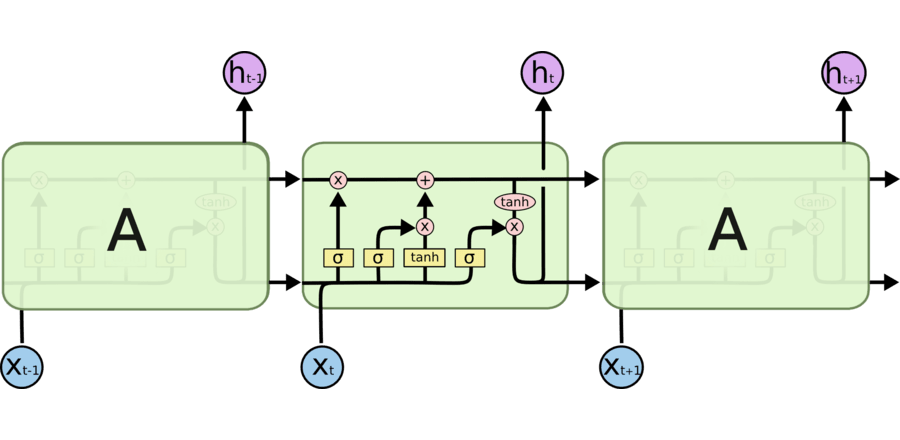

Notations:

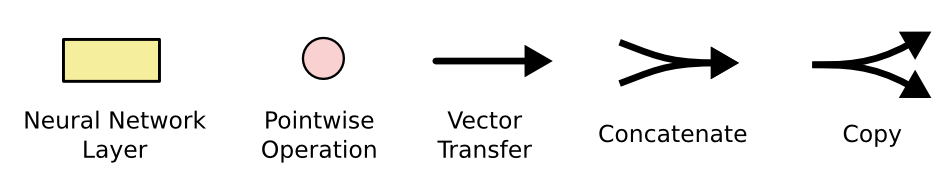

**Neural Network Layer** is a just like a hidden layer in any neural network. Here there are two different neural network layers present:
1.   Sigmoid Neural Network Layer
2.   TanH neural network Layer

**Pointwise Operation** is operation performed between the elements of two matrices. They are performed between the corressponding elements of the matrices. Here there are 3 pointwise operations:

1.   Multiplication

```
 A = [ a11 a12      B = [ b11 b12
       a21 a22 ]          b21 b22 ]    

 A pointwise multiplication B = [ (a11)(b11)   (a12)(b12)
                                  (a21)(b21)   (a22)(b22)  ]
```                               
2.   Addition

```
     A = [ a11 a12      B = [ b11 b12
           a21 a22 ]          b21 b22 ]    

 A pointwise addtion B = [ (a11)+(b11)   (a12)+(b12)
                           (a21)+(b21)   (a22)+(b22)  ]
```
3. TanH


```
B = [ b11 b12
      b21 b22 ]    

 pointwise TanH B = [ tanh(b11)   tanh(b12)
                      tanh(b21)   tanh(b22)  ]
```
**Concatenate**

```
Vector A = [a1 a2 a3 a4 ... an] and Vector B = [b1 b2 b3 b4 ... bm], then

A concatenated with B =  [ a1 a2 a3 ... an b1 b2 b3 ... bm]
```

LSTMs maintain two types of memory: **Long-Term Memory** and **Short-Term Memory**, which work together to overcome the Vanishing Gradient Problem.

**Cell State (𝐶𝑡​)** acts as the Long-Term Memory in an LSTM. It is responsible for storing information from previous inputs and carrying it forward through various time steps. This capability allows the LSTM to maintain context and effectively handle long-term dependencies in sequential data. The cell state is updated through specialized gating mechanisms that determine what information should be retained or discarded.


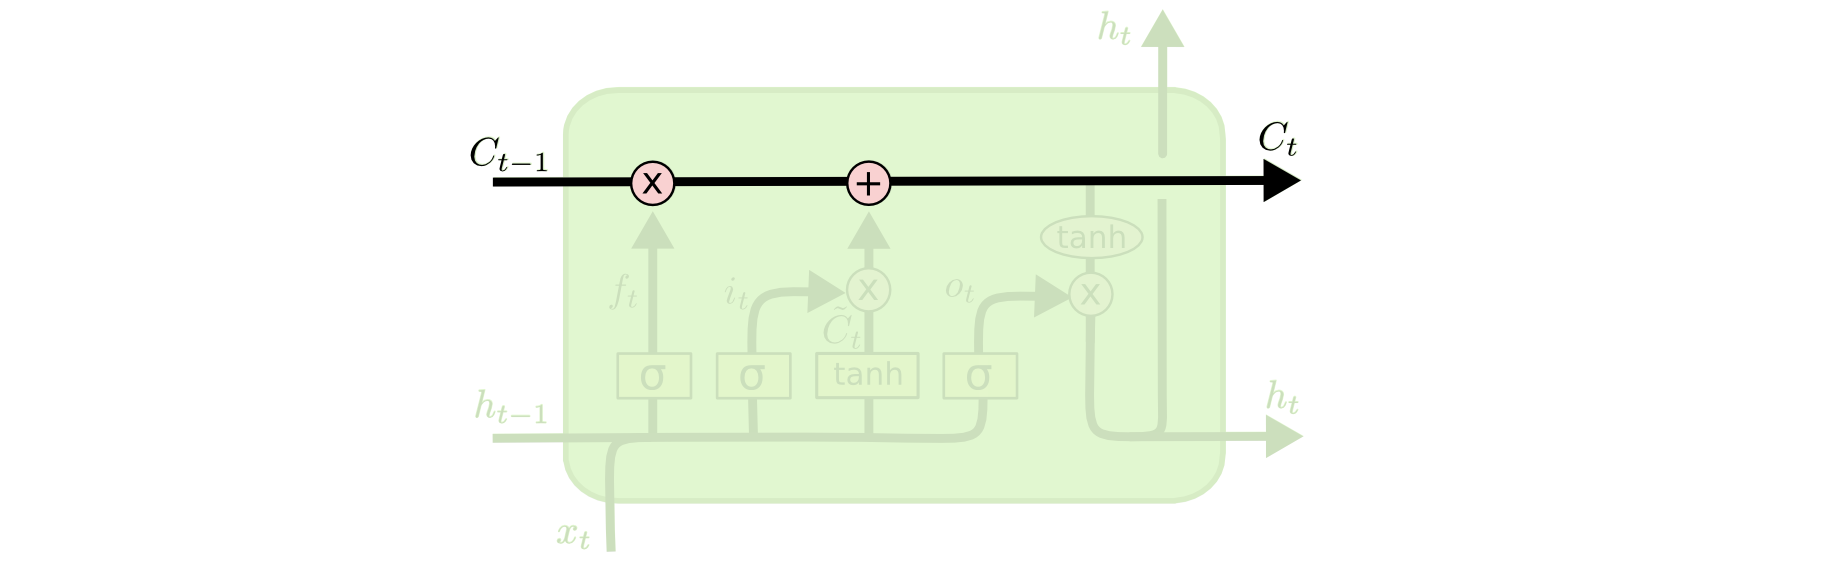



**Hidden State (*h*𝑡)** acts as the Short-Term Memory, it is a summary of the relevant information that the LSTM has processed up to the current time step. It is influenced by both the current input and the information retained in the cell state. While the Cell State (Long-Term Memory) primarily carries information forward over long sequences, the Hidden State provides a more immediate and focused context for the next time step.

**Gates** are special mechanism that help to regulate the flow of information in and out of the cell state and thus are responsible for updating the cell state. There are three gates in LSTM:

1.   Forget Gate
2.   Input Gate
3.   Output Gate

Before we get into the indepth working following is a brief overview of the gates:

**Forget Gate:** Decides which information in the cell state should be discarded, helping the LSTM focus on relevant data.

**Input Gate:** Determines which new information should be added to the cell state, updating the long-term memory.

**Output Gate:** Controls the output by deciding how much of the cell state should influence the hidden state, which then impacts the LSTM’s predictions and is passed to the next time step.

**NOTE:**
1. The dimension of cell state, hidden state, output of forget gate, output of
input gate are same.
2. The number of neuron in all the neural network layers are same.
3. The neural network layers have their own weights and biases but once initialized they remain unchanged untill an entire sequence is processed.
4. The number of neurons in all the neural network layers is equal to the dimension of the Cell State and Hidden State.
5. Although the sigmoid neural network layers in the Forget Gate, Input Gate, and Output Gate all use the same activation function, their outputs differ due to distinct weights and biases. These variations tailor each layer to its specific role in retaining, updating, or outputting information.

# Working

The Cell State and Hidden State are basically vectors of the same dimensions because they represent different aspects of memory with the same set of features.

**1. Forget Gate (*f*𝑡)** determines which information from the cell state the network should discard in order to prevent cluttering of unecessary information in the cell state.



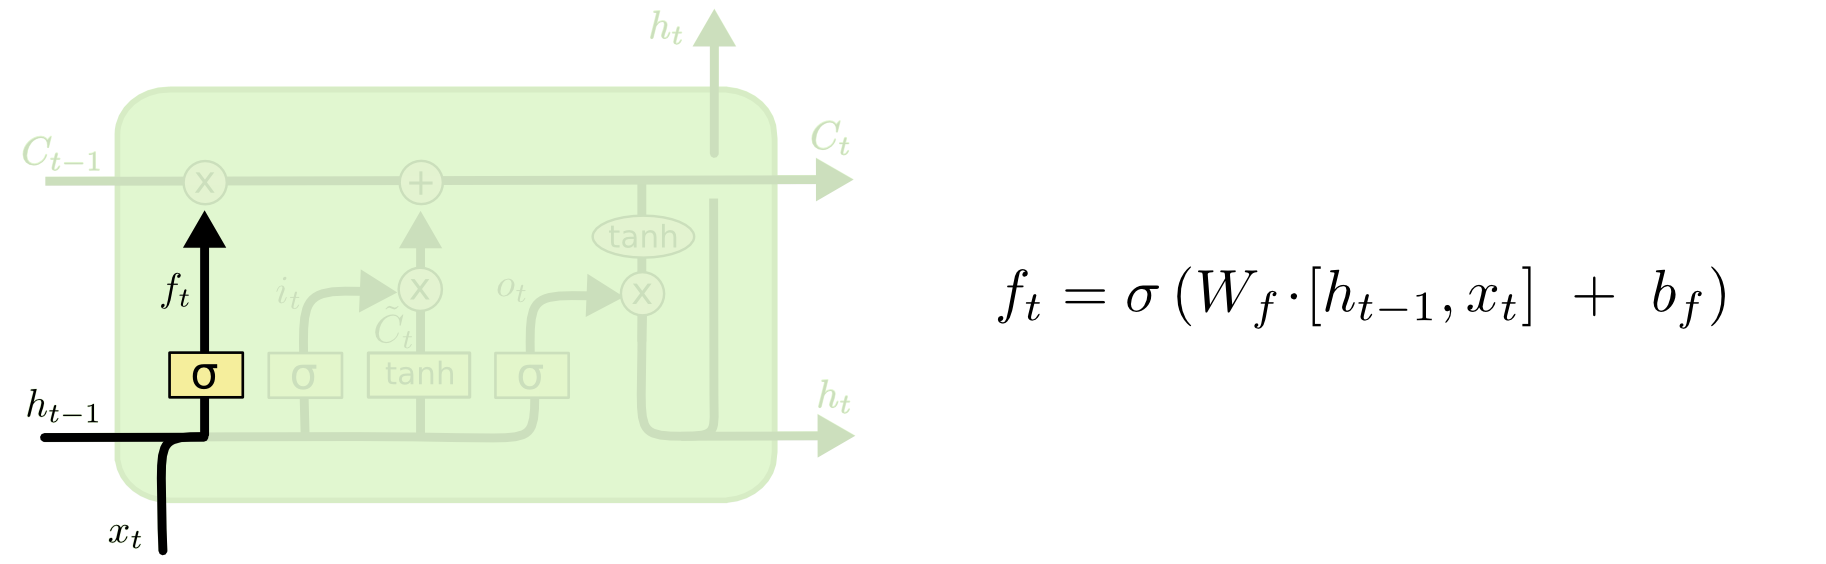

At time step t, the Forget Gate receives two inputs: the Hidden State (ℎ𝑡−1) from the previous time step and the current input (𝑥𝑡). For eg,

(𝑥𝑡) = [0.43 , 0.12 , 0.36]

(ℎ𝑡−1) = [0.40 , 0.34 , 0.56 , 0.34].

These inputs are concatenated into a vector,let's denote it as 𝐴𝑡.

𝐴𝑡 = [0.43 , 0.12 , 0.36 , 0.40 , 0.34 , 0.56 , 0.34]

This concatenated vector 𝐴𝑡 is then passed through a Sigmoid Neural Network Layer.

The Sigmoid layer in the Forget Gate has a number of neurons equal to the dimensionality of the Hidden State or Cell State. This ensures that the output vector (*f*𝑡) from the Sigmoid function, which ranges between 0 and 1, matches the dimensions of the cell state.

Assuming (*f*𝑡) = [0.5 , 0.5 , 0.5 , 0.5]

 Each element of this output vector (*f*𝑡) represents a gate value indicating how much / what fraction / what percentage of the corresponding information in the cell state should be retained, thus discrading the other information.

Then pointwise multiplication takes place between (*f*𝑡) and (𝐶𝑡​) which retains the necessary information in the Cell State.

Assuming (𝐶𝑡-1​) = [0.8 , 0.6 , 0.9 , 0.4]

pointiwise multiplication = [ (0.5)(0.8) , (0.5)(0.6) , (0.5)(0.9) ,(0.5)(0.4) ] =[0.4 , 0.3 , 0.45 , 0.2] = (𝐶𝑡​)

Updated (𝐶𝑡​) = [0.4 , 0.3 , 0.45 , 0.2]

Previous (𝐶𝑡-1​) = [0.8 , 0.6 , 0.9 , 0.4]

Updated values are 50% of the previous (𝐶𝑡-1​) values.

**2. Input Gate (*i𝑡*)** updates the cell state with new information from the current time step. It involves two main steps:

1. Determine Update Values:

  The Input Gate takes the current input  (𝑥𝑡) and the previous Hidden State (ℎ𝑡−1). For eg,
  
  (𝑥𝑡) = [0.43 0.12 0.36]
  
  (ℎ𝑡−1) = [0.40 0.34 0.56 0.34].

  They are concatenated into a single vector [0.43 0.12 0.36 0.40 0.34 0.56 0.34] and passed through a sigmoid activation function to determine how much of each new candidate value should be added to the cell state denoted by (*i𝑡*).
  For eg,
  
  (*i𝑡*) = [0.5 0.5 0.5 0.5]
  
  means 50% of candidate value features are to be retained.This is similar to the the calculation of (f𝑡) in the forget gate.

  Simultaneously, the concatenated input is passed through the tanh neural network layer, that return values between -1 and 1 and creates a vector of candidate values (𝐶'𝑡) that can be added to the cell state.These candidate values represent any context changes in the sequence or potential new information and thus need to be retained so that they can be used later.
  For eg,
  
  (𝐶'𝑡)=[0.6 −0.2 0.8 0.1]

  Now,pointwise multiplication is carried out between (*i𝑡*) and (𝐶'𝑡)
  
    [(0.5)(0.6) , (0.5)(−0.2) , (0.5)(0.8) , (0.5)(0.1)] = [0.3 , −0.1 , 0.4 , 0.05]

   which gives the necessary informaion to be added to the cell state which is then added to the cell state (𝐶𝑡) by pointwise addition operation.

   (𝐶𝑡​) = [0.4 + 0.3  , 0.3 + (-0.1) , 0.45 + 0.4 , 0.2 + 0.05] = [0.7 , 0.2 , 0.85 , 0.25]


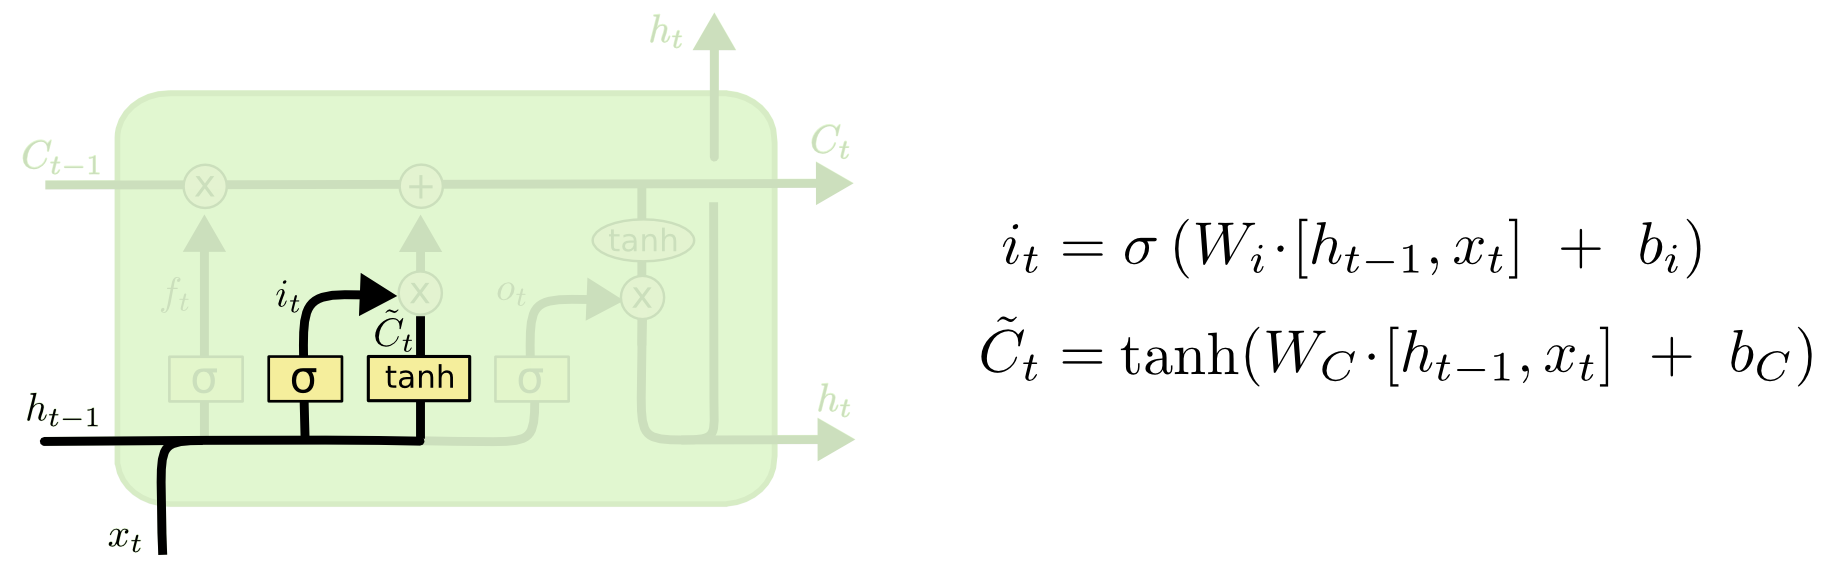


**Output Gate** determines what portion of the current cell state (𝐶𝑡 ) should be output as the Hidden State (ℎ𝑡 ). It controls what information from the cell state will be used for predictions and passed to the next time step.

The concatenated vector is again passed through sigmoid activation function to produce (O𝑡). For eg,

(O𝑡) = [0.7,0.3,0.9,0.6]

which indicates how much of the corresponding element in (𝐶𝑡) should be output as part of the Hidden State.

Now pointowse TanH is applied to the updated (𝐶𝑡) from input gate.
    
 tanH(𝐶𝑡) = tanH([0.7 , 0.2 , 0.85 , 0.25]) = [0.604,0.197,0.691,0.246]

 and pointwise multiplication is carried out with the Output gate values (O𝑡).

[ (0.7)(0.604) , (0.3)(0.197) ,(0.9)(0.691) , (0.6)(0.246) ] = [0.423,0.058,0.624,0.148] = (ℎ𝑡).

The pointwise multiplication operation is also called scaling of Cell state values with the values of gates.

This new (𝐶𝑡) and (ℎ𝑡) is then passed onto the next time step unitll the sequneces complete.

In [ ]:
faqs = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts([faqs])

In [ ]:
len(tokenizer.word_index)

282

In [ ]:
input_sequences = []
for sentence in faqs.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [ ]:
tokenizer.word_index

{'the': 1,
 'you': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'have': 8,
 'will': 9,
 'can': 10,
 'what': 11,
 'course': 12,
 'program': 13,
 'in': 14,
 'for': 15,
 'all': 16,
 'sessions': 17,
 'on': 18,
 'be': 19,
 'and': 20,
 'this': 21,
 'if': 22,
 'am': 23,
 'pay': 24,
 'payment': 25,
 'make': 26,
 'we': 27,
 'do': 28,
 'subscription': 29,
 'where': 30,
 'rs': 31,
 'so': 32,
 'campusx': 33,
 'session': 34,
 'our': 35,
 'paid': 36,
 'join': 37,
 'able': 38,
 'your': 39,
 'website': 40,
 'placement': 41,
 'fee': 42,
 'data': 43,
 'monthly': 44,
 'month': 45,
 'not': 46,
 'get': 47,
 'yes': 48,
 'once': 49,
 'past': 50,
 'feb': 51,
 'assistance': 52,
 'science': 53,
 '7': 54,
 '5600': 55,
 'are': 56,
 'watch': 57,
 'google': 58,
 'by': 59,
 'com': 60,
 'mail': 61,
 'from': 62,
 'contact': 63,
 'us': 64,
 'at': 65,
 'or': 66,
 'doubt': 67,
 'mentorship': 68,
 'payments': 69,
 '799': 70,
 'total': 71,
 'duration': 72,
 'months': 73,
 'learning': 74,
 'case': 75,
 'here': 76,
 '

In [ ]:
input_sequences[0]

[93, 1]

In [ ]:
max_len = max([len(x) for x in input_sequences])
max_len

57

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [ ]:
padded_input_sequences

array([[  0,   0,   0, ...,   0,  93,   1],
       [  0,   0,   0, ...,  93,   1,  13],
       [  0,   0,   0, ...,   0,  11,   7],
       ...,
       [  0,   0,   0, ..., 279,  18, 280],
       [  0,   0,   0, ...,  18, 280, 281],
       [  0,   0,   0, ..., 280, 281, 282]], dtype=int32)

In [ ]:
X = padded_input_sequences[:,:-1]

In [ ]:
y = padded_input_sequences[:,-1]

In [ ]:
X[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 93], dtype=int32)

In [ ]:
X.shape

(863, 1, 56)

In [ ]:
import numpy as np
X = np.expand_dims(X, axis=1)  # Shape will be (batch_size, 1, features)

In [ ]:
y.shape

(863, 283)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=283)

In [ ]:
y.shape

(863, 283, 283)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Embedding(283, 100, input_length=56))
model.add(LSTM(150))
model.add(LSTM(150))
model.add(Dense(283, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X,y,epochs=10)

Epoch 1/10


ValueError: Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 1, 56, 100)

In [ ]:
import time
text = "what is the fee"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

In [ ]:
tokenizer.word_index